           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url    price  year  \
0                prescott    https://prescott.craigslist.org   6000.0   NaN   
1            fayetteville       https://fayar.craigslist.org  11900.0   NaN   
2            florida keys        https://keys.craigslist.org  21000.0   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500.0   NaN   
4              greensboro  https://greensboro.craigslist.org   4900.0   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ..

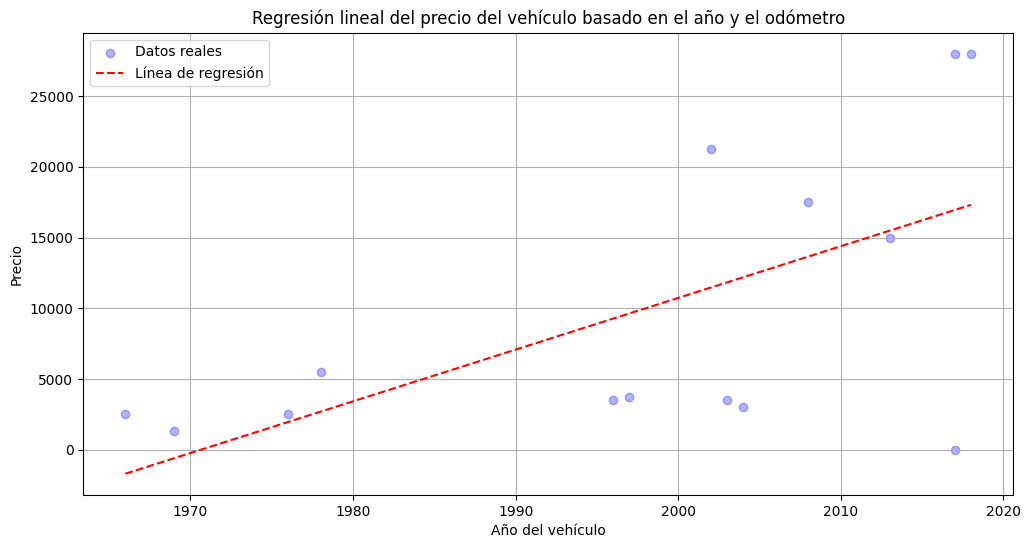

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Leer el fichero vehicles.csv
file_path = 'vehicles.csv'
df = pd.read_csv(file_path)

# Mostrar los primeros registros del dataframe
print(df.head())

# Filtrar las columnas necesarias
df_filtered = df[['year', 'price', 'odometer']].dropna()

# Crear el modelo de regresión lineal para predecir el precio basado en el año y el odómetro
X = df_filtered[['year', 'odometer']]
y = df_filtered['price']

model = LinearRegression()
model.fit(X, y)

# Predicciones
year_range = pd.Series(range(int(df_filtered['year'].min()), int(df_filtered['year'].max()) + 1))
odometer_median = df_filtered['odometer'].median()
pred_data = pd.DataFrame({'year': year_range, 'odometer': odometer_median})
price_pred = model.predict(pred_data)

# Graficar los datos
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de los datos reales
plt.scatter(df_filtered['year'], df_filtered['price'], color='blue', alpha=0.3, label='Datos reales')

# Línea de regresión
plt.plot(year_range, price_pred, color='red', linestyle='--', label='Línea de regresión')

plt.xlabel('Año del vehículo')
plt.ylabel('Precio')
plt.title('Regresión lineal del precio del vehículo basado en el año y el odómetro')
plt.legend()
plt.grid(True)
plt.show()